In [1]:
import re
import pandas as pd
from PIL import Image ,ImageDraw

import numpy as np
from random import randint as rint
import random

In [2]:
#Read in a student number and convert the number to a 14x14 matrix according to the following rules:
user_input = input()

r7654321


In [3]:
#First, remove character 'r' from the student number
dr = []
digits = re.sub("\D","",user_input)
big_list =  list(range(196))
x = 14
list_of_lists = [big_list[i:i+x] for i in range(0, len(big_list), x)]
index_diff = 0
counter_list_even = 0
counter_list = 0

dig_check = digits[0]
if int(dig_check) % 2 != 0: 
        for dig in digits:
            counter_list = counter_list +1;
            rows_list = list_of_lists[counter_list]
            difference = 14 - int(dig);
            random_number = random.randint(0,difference)
            indexes = [0,1,3,5]
            replacements = [0,0,0,0]
            for ind in range(random_number, random_number + int(dig)):
                rows_list[ind] = int(dig)
            counter_list = counter_list +1;    
else:
    for dig in digits:
        rows_list = list_of_lists[counter_list_even]
        difference = 14 - int(dig);
        random_number = random.randint(0,difference)
        indexes = [0,1,3,5]
        replacements = [0,0,0,0]
        for ind in range(random_number, random_number + int(dig)):
            rows_list[ind] = int(dig)        
        counter_list_even = counter_list_even +2;
new_matrix = [list(i) for i in zip(*list_of_lists)]
index = 0
while index != 14:
    for t in new_matrix[index]:    
        print(t,end='  ')
    index += 1
    print('\n') 

0  14  28  42  56  70  84  98  112  126  140  154  168  182  

1  15  29  6  57  71  85  99  113  127  141  2  169  183  

2  16  30  6  58  72  86  100  114  128  142  2  170  184  

3  17  31  6  59  73  87  4  115  129  143  157  171  185  

4  7  32  6  60  74  88  4  116  130  144  158  172  186  

5  7  33  6  61  75  89  4  117  131  145  159  173  187  

6  7  34  6  62  76  90  4  118  132  146  160  174  188  

7  7  35  49  63  77  91  105  119  133  147  161  175  189  

8  7  36  50  64  5  92  106  120  134  148  162  176  190  

9  7  37  51  65  5  93  107  121  135  149  163  177  191  

10  7  38  52  66  5  94  108  122  136  150  164  178  192  

11  25  39  53  67  5  95  109  123  3  151  165  179  193  

12  26  40  54  68  5  96  110  124  3  152  166  180  1  

13  27  41  55  69  83  97  111  125  3  153  167  181  195  



In [4]:

def interpolate(f_co, t_co, interval):
    det_co =[(t - f) / interval for f , t in zip(f_co, t_co)]
    for i in range(interval):
        yield [round(f + det * i) for f, det in zip(f_co, det_co)]


imgsize=(140,140)
gradient = Image.new('RGBA', imgsize, color=0)
draw = ImageDraw.Draw(gradient)




In [5]:
digits = digits[::-1]
if int(digits[0]) == 1:
    t_co = (255,69,0)
elif int(digits[0]) == 0:
    t_co = (255,255,0)  
elif int(digits[0]) == 2:
    t_co =(255,0,0)
elif int(digits[0]) == 3:
    t_co =(128,0,128)
elif int(digits[0]) == 4:
    t_co = (0,0,255)
elif int(digits[0]) == 5:
    t_co = (48,213,200)
elif int(digits[0]) == 6:
    t_co = (0,255,0)
elif int(digits[0]) == 7:
     t_co = (0,100,0)
elif int(digits[0]) == 8:
    t_co = (150,75,0)  
elif int(digits[0]) == 9:
    t_co = (105,105,105)

In [9]:
f_co = (0,0,0)
for i, color in enumerate(interpolate(f_co, t_co, gradient.width * 1)):
    draw.line([(i, 0), (i, gradient.height)], tuple(color), width=1)

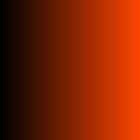

In [10]:
rgb_im = gradient.convert('RGB')
rgb_im.save(user_input+'.jpg')
gradient